In [16]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
ev_data = pd.read_excel('data/raw/hand_ev9.xlsx')

In [18]:
position_cols = ['SB',"BB",'pos3','pos4','pos5','pos6','pos7','pos8','D']

In [19]:
data_melted = ev_data.melt(
    id_vars=['hand'],
    value_vars=position_cols,
    var_name='position',
    value_name='EV')

In [25]:
pos_dummies = pd.get_dummies(data_melted['position'],prefix="dum", dtype=int)
modeling_data = pd.concat([data_melted, pos_dummies], axis=1)

In [26]:
dum_cols = ['dum_SB','dum_BB','dum_pos3','dum_pos4','dum_pos5','dum_pos6','dum_pos7','dum_pos8','dum_D']

In [43]:
modeling_data[modeling_data.EV < -.15].position.value_counts()

position
BB      120
SB      113
pos3      7
pos5      3
pos4      2
pos6      1
pos7      1
Name: count, dtype: int64

In [36]:
modeling_data['EV'].describe()

count    1521.000000
mean       -0.004635
std         0.320438
min        -0.420000
25%        -0.100000
50%        -0.050000
75%        -0.010000
max         2.810000
Name: EV, dtype: float64

Text(0.5, 0, 'EV')

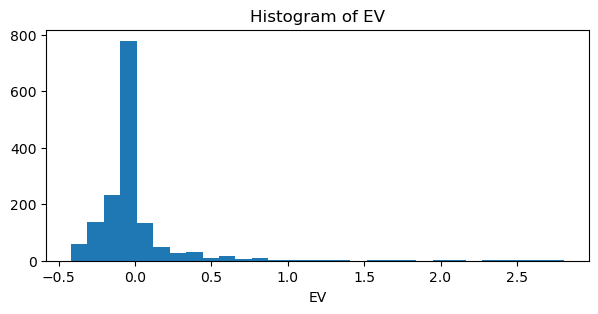

In [35]:
plt.figure(figsize=(7,3))
plt.hist(x=modeling_data['EV'], bins=30)
plt.title("Histogram of EV")
plt.xlabel("EV")

In [27]:
modeling_data

,hand,position,EV,dum_BB,dum_D,dum_SB,dum_pos3,dum_pos4,dum_pos5,dum_pos6,dum_pos7,dum_pos8
0,AAo,SB,2.65,0,0,1,0,0,0,0,0,0
1,KKo,SB,1.69,0,0,1,0,0,0,0,0,0
2,QQo,SB,0.99,0,0,1,0,0,0,0,0,0
3,JJo,SB,0.67,0,0,1,0,0,0,0,0,0
4,TTo,SB,0.41,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1516,43s,D,-0.01,0,1,0,0,0,0,0,0,0
1517,42o,D,-0.03,0,1,0,0,0,0,0,0,0
1518,42s,D,-0.09,0,1,0,0,0,0,0,0,0
1519,32o,D,-0.03,0,1,0,0,0,0,0,0,0


In [13]:
model1 = smf.mixedlm(
    formula=f"EV ~ {'+'.join(dum_cols)}", 
    data=modeling_data, 
    groups=modeling_data["hand"]).fit(reml=False)

print(model1.summary())

           Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  EV       
No. Observations:   1521     Method:              ML       
No. Groups:         169      Scale:               0.0029   
Min. group size:    9        Log-Likelihood:      1800.0260
Max. group size:    9        Converged:           Yes      
Mean group size:    9.0                                    
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        -0.124    0.024 -5.171 0.000 -0.170 -0.077
dum_BB[T.True]   -0.042    0.006 -7.221 0.000 -0.054 -0.031
dum_pos3[T.True]  0.118    0.006 20.083 0.000  0.107  0.130
dum_pos4[T.True]  0.145    0.006 24.608 0.000  0.133  0.156
dum_pos5[T.True]  0.153    0.006 26.016 0.000  0.142  0.165
dum_pos6[T.True]  0.158    0.006 26.781 0.000  0.146  0.169
dum_pos7[T.True]  0.170    0.006 28.913 0.000  0.15

In [14]:
re_vars = ['dum_BB','dum_pos3','dum_pos4','dum_pos5','dum_pos6','dum_pos7','dum_pos8','dum_D']

In [15]:
model2 = smf.mixedlm(
    formula=f"EV ~ {'+'.join(dum_cols)}", 
    data=modeling_data, 
    groups=modeling_data["hand"],
    re_formula=f"~1 + {'+'.join(re_vars)}").fit(reml=False)

print(model2.summary())

c:\Users\campb\miniconda3\envs\poker_env\lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
c:\Users\campb\miniconda3\envs\poker_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\campb\miniconda3\envs\poker_env\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
c:\Users\campb\miniconda3\envs\poker_env\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


                      Mixed Linear Model Regression Results
Model:                     MixedLM          Dependent Variable:          EV       
No. Observations:          1521             Method:                      ML       
No. Groups:                169              Scale:                       0.0015   
Min. group size:           9                Log-Likelihood:              2009.1319
Max. group size:           9                Converged:                   Yes      
Mean group size:           9.0                                                    
----------------------------------------------------------------------------------
                                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------
Intercept                               -0.124    0.023 -5.289 0.000 -0.169 -0.078
dum_BB[T.True]                          -0.042    0.006 -7.314 0.000 -0.054 -0.031
dum_pos3[T.True]           